<a href="https://colab.research.google.com/github/yustiks/statistics_in_python/blob/master/extra_lecture_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

In [0]:
import io
import requests
url="http://yustiks.ru/faults.csv"
dataset_temp=pd.read_csv(url) 
dataset_temp.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [0]:
data = dataset_temp.iloc[:,:27]
data[:4]

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212


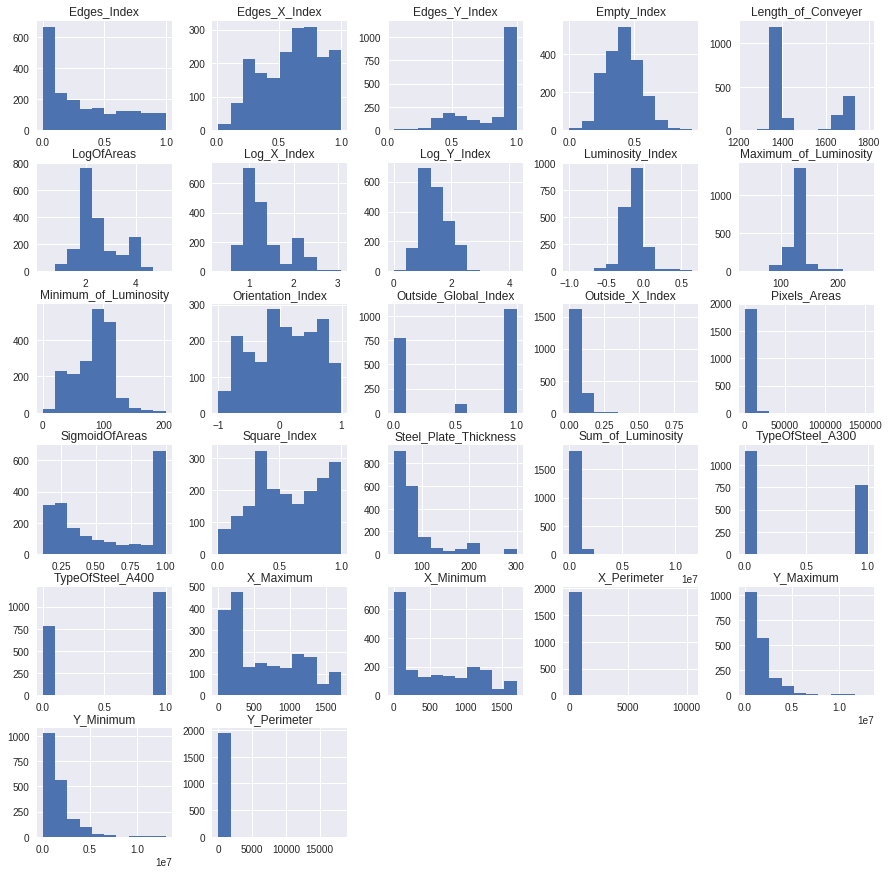

In [0]:

data.hist(figsize=(15,15))
plt.show()

In [0]:
headers = list(data.columns.values)
headers


['X_Minimum',
 'X_Maximum',
 'Y_Minimum',
 'Y_Maximum',
 'Pixels_Areas',
 'X_Perimeter',
 'Y_Perimeter',
 'Sum_of_Luminosity',
 'Minimum_of_Luminosity',
 'Maximum_of_Luminosity',
 'Length_of_Conveyer',
 'TypeOfSteel_A300',
 'TypeOfSteel_A400',
 'Steel_Plate_Thickness',
 'Edges_Index',
 'Empty_Index',
 'Square_Index',
 'Outside_X_Index',
 'Edges_X_Index',
 'Edges_Y_Index',
 'Outside_Global_Index',
 'LogOfAreas',
 'Log_X_Index',
 'Log_Y_Index',
 'Orientation_Index',
 'Luminosity_Index',
 'SigmoidOfAreas']

In [0]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data)
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

         0         1         2         3         4         5         6   \
0 -0.950733 -0.946167 -0.959296 -0.959291 -0.996528 -0.997128 -0.995262   
1 -0.243402 -0.242832 -0.609987 -0.609985 -0.998611 -0.998468 -0.996805   
2 -0.027566 -0.027501 -0.761620 -0.761619 -0.999096 -0.998851 -0.998017   
3  0.000587  0.001755 -0.944125 -0.944120 -0.997720 -0.997894 -0.995152   
4  0.512023  0.523698 -0.924294 -0.924257 -0.968464 -0.988896 -0.971462   

         7         8         9     ...           17        18        19   20  \
0 -0.995864 -0.251232 -0.342593    ...    -0.992681 -0.074269  1.000000  1.0   
1 -0.998077 -0.172414 -0.203704    ...    -0.995197  0.188312  0.930013  1.0   
2 -0.998668 -0.024631 -0.185185    ...    -0.994968  0.492695  0.889449  1.0   
3 -0.996765 -0.024631 -0.175926    ...    -0.991537  0.063515  1.000000  1.0   
4 -0.957437 -0.635468 -0.175926    ...    -0.974611 -0.454343  0.975830  1.0   

         21        22        23        24        25        26  
0 -0

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:
df_norm.columns = headers
print(df_norm[:5])

   X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0  -0.950733  -0.946167  -0.959296  -0.959291     -0.996528    -0.997128   
1  -0.243402  -0.242832  -0.609987  -0.609985     -0.998611    -0.998468   
2  -0.027566  -0.027501  -0.761620  -0.761619     -0.999096    -0.998851   
3   0.000587   0.001755  -0.944125  -0.944120     -0.997720    -0.997894   
4   0.512023   0.523698  -0.924294  -0.924257     -0.968464    -0.988896   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0    -0.995262          -0.995864              -0.251232   
1    -0.996805          -0.998077              -0.172414   
2    -0.998017          -0.998668              -0.024631   
3    -0.995152          -0.996765              -0.024631   
4    -0.971462          -0.957437              -0.635468   

   Maximum_of_Luminosity       ...        Outside_X_Index  Edges_X_Index  \
0              -0.342593       ...              -0.992681      -0.074269   
1              -0.203704      

In [0]:
df_norm.corr()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,...,-0.361160,0.154778,0.367907,0.147282,-0.428553,-0.437944,-0.326851,0.178585,-0.031578,-0.355251
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,...,-0.214930,0.149259,0.271915,0.099253,-0.332169,-0.324012,-0.265990,0.115019,-0.038996,-0.286736
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,...,0.054165,0.066085,-0.036543,-0.062911,0.044952,0.070406,-0.008442,-0.086497,-0.090654,0.025257
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,...,0.054185,0.066051,-0.036549,-0.062901,0.044994,0.070432,-0.008382,-0.086480,-0.090666,0.025284
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,...,0.588606,-0.294673,-0.463571,-0.109655,0.650234,0.603072,0.578342,-0.137604,-0.043449,0.422947
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,...,0.517098,-0.293039,-0.412100,-0.079106,0.563036,0.524716,0.523472,-0.101731,-0.032617,0.380605
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,...,0.209160,-0.195162,-0.136723,0.013438,0.294040,0.228485,0.344378,0.031381,-0.047778,0.191772
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,...,0.658339,-0.327728,-0.529745,-0.121090,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,...,-0.487574,0.252256,0.316610,0.035462,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797
Maximum_of_Luminosity,-0.075554,-0.062392,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,...,0.099300,0.093522,-0.167441,-0.124039,0.007672,0.092823,-0.069522,-0.169747,0.870160,-0.039651


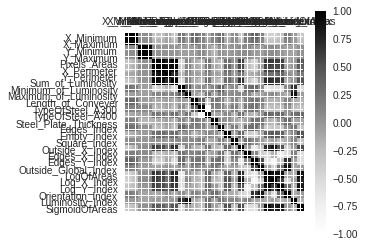

In [0]:
plt.matshow(df_norm.corr())
plt.xticks(range(len(df_norm.columns)), df_norm.columns)
plt.yticks(range(len(df_norm.columns)), df_norm.columns)
plt.colorbar()
plt.show()

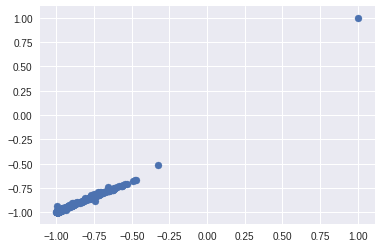

In [0]:
plt.scatter(df_norm['Sum_of_Luminosity'], df_norm['Pixels_Areas'])

In [0]:
# Create correlation matrix
corr_matrix = df_norm.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(to_drop)

['X_Maximum', 'Y_Maximum', 'X_Perimeter', 'Sum_of_Luminosity', 'TypeOfSteel_A400']


In [0]:
df_norm = df_norm.drop(df_norm[to_drop], axis=1)
df_norm


,X_Minimum,Y_Minimum,Pixels_Areas,Y_Perimeter,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,Steel_Plate_Thickness,Edges_Index,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,-0.950733,-0.959296,-0.996528,-0.995262,-0.251232,-0.342593,0.622575,1.0,-0.692308,-0.899920,...,-0.992681,-0.074269,1.000000,1.0,-0.129375,-0.565757,-0.228168,0.824986,-0.137599,0.051532
1,-0.243402,-0.609987,-0.998611,-0.996805,-0.172414,-0.203704,0.622575,1.0,-0.692308,0.536777,...,-0.995197,0.188312,0.930013,1.0,-0.290393,-0.655836,-0.313218,0.799667,0.003413,-0.592736
2,-0.027566,-0.761620,-0.999096,-0.998017,-0.024631,-0.185185,0.396825,1.0,-0.538462,0.951367,...,-0.994968,0.492695,0.889449,1.0,-0.364982,-0.655836,-0.410477,0.672164,0.067764,-0.782066
3,0.000587,-0.944125,-0.997720,-0.995152,-0.024631,-0.175926,-0.555556,-1.0,0.923077,0.464429,...,-0.991537,0.063515,1.000000,1.0,-0.203514,-0.607587,-0.223613,0.851415,0.026325,-0.086947
4,0.512023,-0.924294,-0.968464,-0.971462,-0.635468,-0.175926,-0.555556,-1.0,0.115385,-0.860330,...,-0.974611,-0.454343,0.975830,1.0,0.261925,-0.329631,0.131754,0.941595,-0.025350,1.000000
5,-0.495601,-0.985588,-0.991772,-0.990524,-0.369458,-0.166667,-0.435626,-1.0,-1.000000,0.245981,...,-0.985361,0.086851,1.000000,1.0,0.023327,-0.466013,-0.089159,0.880870,-0.058867,0.971396
6,-0.515543,-0.979700,-0.881430,-0.952510,-0.773399,0.500000,0.622575,-1.0,-0.153846,-0.016077,...,-0.958600,-0.738028,0.917402,1.0,0.497409,-0.121921,0.229530,0.928179,0.557587,1.000000
7,-0.777126,-0.968535,-0.998297,-0.997906,0.221675,0.250000,0.622575,-1.0,-0.153846,-0.547227,...,-0.989936,0.815544,1.000000,1.0,-0.254675,-0.495871,-0.389015,0.504010,0.441804,-0.507605
8,-0.612903,-0.934902,-0.996567,-0.997245,-0.477833,0.027778,0.622575,-1.0,-0.153846,-0.213826,...,-0.985819,0.729505,1.000000,1.0,-0.131382,-0.413725,-0.335478,0.504010,0.071542,-0.000454
9,-0.913196,-0.880990,-0.980295,-0.981709,-0.477833,-0.018519,0.622575,-1.0,-0.153846,-0.823754,...,-0.981702,-0.323458,0.962169,1.0,0.178364,-0.348671,0.040130,0.909921,0.138087,1.000000


In [0]:
df_norm.shape

(1941, 22)